In [1]:
source("/ahg/regevdata/users/jklugham/projects/HTAPP_MBC/src/init.R")
library("LiblineaR")
library("randomForest")
library("genefu")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Loading required package: Matrix
Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading combined annotation: annot
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: survcomp
Loading required package: survival
Loading required package: prodlim
Loading required package: mclust
Package 'mclust' version 5.4.3
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: limma
Loading required package: biomaRt
Loading required package: iC10
Loading required package: pamr
Loading required 

In [2]:
wd=file.path(analysisDir,"00_spatial_probes")
dir.create(wd)
setwd(wd)

Warning message in dir.create(wd):
"'/ahg/regevdata/projects/HTAPP_MBC//phase1/analysis//00_spatial_probes' already exists"

In [ ]:
simpleCache(cacheName = "frozen_TST_V3_combined",
            instruction = "", 
            cacheDir = cacheDir, 
            cacheSubDir = "combined_seurat", 
            recreate = FALSE,assignToVariable = "cs")

Character instruction; consider wrapping in braces.
::Loading cache::	/ahg/regevdata/projects/HTAPP_MBC//phase1/RCache//combined_seurat/frozen_TST_V3_combined.RData


In [62]:
cell_types=c("Epithelial_cells","Epithelial_stem","T_cells","B_cell","Fibroblasts","Endothelial_cells","MonoMacro")

### Add meta data

In [5]:
cond=rbindlist(lapply(strsplit(row.names(cs@meta.data),"_"),
                      function(x){data.frame(rbind(c(paste(x,collapse = "_"),x[c(1,2,3)])))}))
setnames(cond,names(cond),c("cellid","sampleID","condition","channel"))

In [6]:
cond_an=merge(cond,unique(annot[,c("sampleid","site","receptors_biopsy","site_biopsy","histology_breast2"),]),by.x="sampleID",by.y="sampleid")
cond_an=data.frame(cond_an,row.names = which(colnames(cond_an)=="cellid"))
head(cond_an)

,sampleID,condition,channel,site,receptors_biopsy,site_biopsy,histology_breast2
HTAPP-211-SMP-6751_TST_channel1_AAACCCAAGAAATGGG-1,HTAPP-211-SMP-6751,TST,channel1,liver,NA,NA,NA
HTAPP-211-SMP-6751_TST_channel1_AAAGGATGTGTCCATA-1,HTAPP-211-SMP-6751,TST,channel1,liver,NA,NA,NA
HTAPP-211-SMP-6751_TST_channel1_AAAGTCCAGTGGTGAC-1,HTAPP-211-SMP-6751,TST,channel1,liver,NA,NA,NA
HTAPP-211-SMP-6751_TST_channel1_AACAAAGCAAGCACAG-1,HTAPP-211-SMP-6751,TST,channel1,liver,NA,NA,NA
HTAPP-211-SMP-6751_TST_channel1_AACAAAGGTGCCTGCA-1,HTAPP-211-SMP-6751,TST,channel1,liver,NA,NA,NA
HTAPP-211-SMP-6751_TST_channel1_AACAAGAGTCCAGCGT-1,HTAPP-211-SMP-6751,TST,channel1,liver,NA,NA,NA


In [7]:
cs=AddMetaData(cs,metadata = cond_an)

In [8]:
sort(table(cs@meta.data$labels))


          BM & Prog.                  GMP            Myelocyte 
                   1                    1                    1 
       Pro-Myelocyte                  CMP     Pre-B_cell_CD34- 
                   1                    2                    2 
        Erythroblast     Pro-B_cell_CD34+          Gametocytes 
                   3                    6                    8 
          Neutrophil                  MEP            HSC_CD34+ 
                  12                   13                   37 
         Neutrophils           HSC_-G-CSF    Tissue_stem_cells 
                  74                   97                  116 
           Platelets        Keratinocytes                   DC 
                 119                  433                  439 
Neuroepithelial_cell            iPS_cells                  MSC 
                 564                  577                  589 
              B_cell              NK_cell            Astrocyte 
                 679                  8

In [9]:
#set "weird" cancer cells as separate cell type
lab_dt=as.data.table(cs@meta.data[,c("labels","labels_detail")],keep.rownames = "cellid")
lab_dt[,labels_mod:=ifelse(labels%in%c("Neuroepithelial_cell","Neurons","Astrocyte","Embryonic_stem_cells","iPS_cells"),"Epithelial_stem",labels),]
setnames(lab_dt,c("labels","labels_mod"),c("labels_orig","labels"))
lab_df=data.frame(lab_dt,row.names = "cellid")
cs=AddMetaData(cs,metadata = lab_df)

In [10]:
cs=FindClusters(object = cs, reduction.type = "pca", dims.use = 1:10, resolution = 0.6, print.output = 0)

In [11]:
cs=SetIdent(cs,ident.use = cs@meta.data$labels)

In [77]:
#create annotation by combining cluster ids and labels
lab_dt=as.data.table(cs@meta.data[,c("labels","res.0.6")],keep.rownames = "cellid")
lab_dt[,labels_clean:=labels,]
lab_dt[labels%in%c("Monocyte","Macrophage"),labels_clean:="MonoMacro",]
lab_dt[labels%in%c("Chondrocytes"),labels_clean:="Fibroblasts",]
lab_dt[res.0.6!=7&labels%in%c("T_cells"),labels_clean:="ambiguous",]
lab_dt[res.0.6!=7&labels%in%c("B_cell"),labels_clean:="ambiguous",]
lab_dt[res.0.6%in%c(12,13,16,17),labels_clean:="ambiguous",]
lab_df=data.frame(lab_dt,row.names = "cellid")
cs=AddMetaData(cs,metadata = lab_df)

#### Add Subtyping pam50 model

In [12]:
dat=t(cs@data)
#dat=t(apply(dat,1,function(x){log2(x/sum(x)*10000+1)})) # weirdly apply undoes the previous t()

In [13]:
rownames(pam50$centroids)[!rownames(pam50$centroids)%in%colnames(dat)]

[1] "CDCA1" "KNTC2" "MIA"   "ORC6L"

Some gene names don't match between pam50 and scRNAseq data
CDCA1=NUF2
KNTC2=NDC80
ORC6L=ORC6

In [14]:
pam50_gene=rownames(pam50$centroids)
pam50_gene[pam50_gene=="CDCA1"]="NUF2"
pam50_gene[pam50_gene=="KNTC2"]="NDC80"
pam50_gene[pam50_gene=="ORC6L"]="ORC6"

In [15]:
colnames(dat)[colnames(dat)=="NUF2"]="CDCA1"
colnames(dat)[colnames(dat)=="NDC80"]="KNTC2"
colnames(dat)[colnames(dat)=="ORC6"]="ORC6L"
gene_annot=data.frame(Gene.Symbol=colnames(dat))

In [16]:
oldw <- getOption("warn")
options(warn=-1)
mst=molecular.subtyping(sbt.model="pam50",data=dat,annot = gene_annot )
options(warn=oldw)

In [17]:
mst_dt=as.data.table(mst$subtype.proba,keep.rownames = "cellid")

In [18]:
mst_dt[,subtype:=c("Basal","Her2","LumA","LumB","Normal")[which.max(c(Basal,Her2,LumA,LumB,Normal))],by=1:nrow(mst_dt)]
mst_dt[,subtype_prob:=max(c(Basal,Her2,LumA,LumB,Normal)),by=1:nrow(mst_dt)]

In [19]:
mst_dt[,subtype_filt:=ifelse(subtype_prob<0.6|is.na(subtype_prob),"unknown",subtype),]

In [20]:
mst_df=data.frame(mst_dt,row.names = "cellid")
head(mst_df)
table(mst_df$subtype_filt=="unknown")

,Basal,Her2,LumA,LumB,Normal,subtype,subtype_prob,subtype_filt
HTAPP-525-SMP-6765_TST_channel1_AAACGCTGTACTGAGG-1,NA,NA,NA,NA,NA,NA,NA,unknown
HTAPP-525-SMP-6765_TST_channel1_AAACGCTGTTAGCGGA-1,NA,NA,NA,NA,NA,NA,NA,unknown
HTAPP-525-SMP-6765_TST_channel1_AAAGAACCACAACCGC-1,0.3043478,0.2753623,0.0000000,0.0000000,0.4202899,Normal,0.4202899,unknown
HTAPP-525-SMP-6765_TST_channel1_AACAACCTCGCTCCTA-1,0.0000000,0.0000000,0.4130435,0.0000000,0.5869565,Normal,0.5869565,unknown
HTAPP-525-SMP-6765_TST_channel1_AACCAACCAAGCTGTT-1,0.0000000,0.0000000,0.0500000,0.0000000,0.9500000,Normal,0.9500000,Normal
HTAPP-525-SMP-6765_TST_channel1_AACCACATCATGTCAG-1,0.0000000,0.0000000,0.6216216,0.1891892,0.1891892,LumA,0.6216216,LumA



FALSE  TRUE 
29285 40084 

In [21]:
cs=AddMetaData(cs,metadata = mst_df)

#### Metadata overview

In [78]:
md=as.data.table(cs@meta.data,keep.rownames = "cellid")
head(md)

cellid,nGene,nUMI,orig.ident,percent.mito,res.1,res.0.8,labels_detail,pval_detail,score_detail,rel_score_detail,N_labels_detail,labels,pval,score,rel_score,N_labels,S.Score,G2M.Score,Phase,sampleID,condition,channel,MBC.Epithelial.ER,CAFs,Endothelial.cells,Macrophages,T.cells,B.cells,SnS.Mast.Cell,Plasma.cells.z2,HSIAO_LIVER,SnS.NK,SnS.T.CD8,SnS.T.CD4,Tirosh.Treg,mean_cn_up,mean_cn_dn,total_cn,rel_up,rel_dn,rel_n,N_cnv_genes,cnv_cluster,site,receptors_biopsy,site_biopsy,histology_breast2,labels_orig,res.0.6,Basal,Her2,LumA,LumB,Normal,subtype,subtype_prob,subtype_filt,labels_clean
HTAPP-525-SMP-6765_TST_channel1_AAACGCTGTACTGAGG-1,343,393,HTAPP-525-SMP-6765_TST_channel1,0.06870229,17,2,Epithelial_cells:bronchial,0.0003233116,0.07239250,0.008927302,3170,Epithelial_cells,0.001889529,0.08267390,0.04797065,5492,-0.041990874,-0.03868203,G1,HTAPP-525-SMP-6765,TST,channel1,-0.015941472,-0.02210104,0.010099709,0.003806003,-0.02946220,0.09232176,-0.0592380936,0.06812887,-0.020450697,-0.01445313,-0.03459929,-0.04091030,0.03758564,0,0,0,0,0,0,0,0,right breast skin punch,NA,NA,NA,Epithelial_cells,12,NA,NA,NA,NA,NA,NA,NA,unknown,ambiguous
HTAPP-525-SMP-6765_TST_channel1_AAACGCTGTTAGCGGA-1,391,462,HTAPP-525-SMP-6765_TST_channel1,0.10606061,17,2,Epithelial_cells:bronchial,0.0192605865,0.06833285,0.013032548,3170,Epithelial_cells,0.051371862,0.07047927,0.05907574,5492,-0.030293330,-0.03377888,G1,HTAPP-525-SMP-6765,TST,channel1,-0.023411015,-0.06598099,-0.007742288,0.043338873,-0.02701796,-0.01504544,0.0002286102,0.06363241,0.004766565,-0.02370247,-0.03545021,-0.04216135,0.00112085,0,0,0,0,0,0,0,0,right breast skin punch,NA,NA,NA,Epithelial_cells,12,NA,NA,NA,NA,NA,NA,NA,unknown,ambiguous
HTAPP-525-SMP-6765_TST_channel1_AAAGAACCACAACCGC-1,408,471,HTAPP-525-SMP-6765_TST_channel1,0.06157113,17,2,Epithelial_cells:bronchial,0.0078865491,0.06858321,0.010509605,3170,Epithelial_cells,0.025982909,0.07481747,0.04768806,5492,-0.044572552,0.02759139,G2M,HTAPP-525-SMP-6765,TST,channel1,0.005913538,-0.06036831,0.072401466,0.006312900,-0.02706469,-0.02352903,0.0286893288,-0.02303882,0.017458385,-0.02082657,-0.04448054,0.18273402,0.06899296,0,0,0,0,0,0,0,0,right breast skin punch,NA,NA,NA,Epithelial_cells,12,0.3043478,0.2753623,0.0000000,0.0000000,0.4202899,Normal,0.4202899,unknown,ambiguous
HTAPP-525-SMP-6765_TST_channel1_AACAACCTCGCTCCTA-1,308,348,HTAPP-525-SMP-6765_TST_channel1,0.06609195,17,2,Epithelial_cells:bronchial,0.0049697260,0.07470443,0.015299106,3170,Epithelial_cells,0.004355337,0.08834629,0.10538287,5492,-0.034532864,0.09508338,G2M,HTAPP-525-SMP-6765,TST,channel1,0.024789017,-0.05580600,-0.027832364,-0.026371348,-0.02293872,-0.01473186,-0.0104861981,-0.01609428,-0.017630445,-0.02425142,-0.02918950,0.18364293,0.04451241,0,0,0,0,0,0,0,0,right breast skin punch,NA,NA,NA,Epithelial_cells,12,0.0000000,0.0000000,0.4130435,0.0000000,0.5869565,Normal,0.5869565,unknown,ambiguous
HTAPP-525-SMP-6765_TST_channel1_AACCAACCAAGCTGTT-1,589,720,HTAPP-525-SMP-6765_TST_channel1,0.06111111,17,2,Neurons:ES_cell-derived_neural_precursor,0.0204120095,0.10593185,0.010204089,252,Epithelial_cells,0.072983191,0.11058799,0.04269491,5492,0.061411321,-0.05050363,S,HTAPP-525-SMP-6765,TST,channel1,0.008578413,-0.09064073,-0.066906236,-0.011942304,-0.04255508,-0.02931355,0.0119335518,-0.03788996,-0.026273127,-0.02531858,-0.05805452,-0.06082423,-0.02527851,0,0,0,0,0,0,0,0,right breast skin punch,NA,NA,NA,Epithelial_cells,12,0.0000000,0.0000000,0.0500000,0.0000000,0.9500000,Normal,0.9500000,Normal,ambiguous
HTAPP-525-SMP-6765_TST_channel1_AACCACATCATGTCAG-1,701,1035,HTAPP-525-SMP-6765_TST_channel1,0.03864734,3,2,Epithelial_cells:bronchial,0.0045836871,0.08535415,0.012307266,3170,Epithelial_cells,0.034914218,0.07977406,0.05964153,5492,-0.009011243,-0.04203442,G1,HTAPP-525-SMP-6765,TST,channel1,-0.025880500,-0.08246784,-0.061989548,0.005897073,0.02560654,-0.03453692,0.0256668077,-0.04038642,-0.021946254,-0.03340280,0.08081260,0.08448172,-0.02971074,0,0,0,0,0,0,0,0,right breast skin

### Data overview

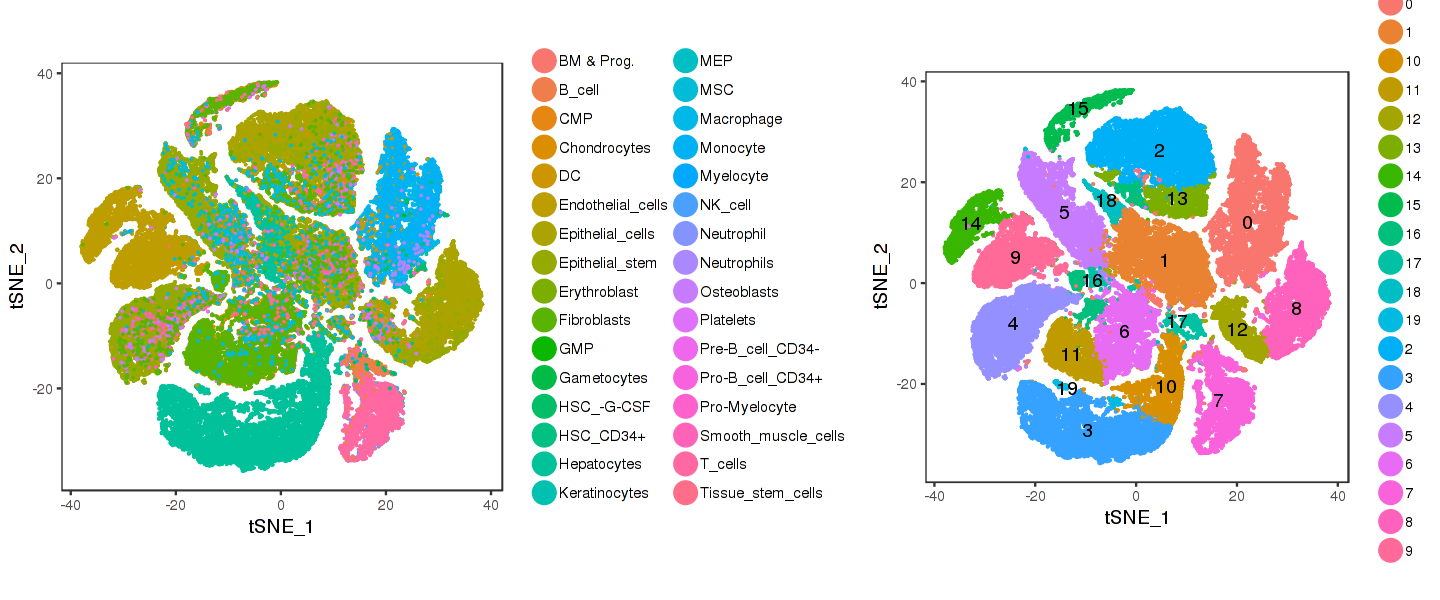

In [54]:
options(repr.plot.width = 12, repr.plot.height = 5)
p1=TSNEPlot(SubsetData(cs,subset.name = "N_labels",accept.low = 0),coord.fixed=TRUE,do.label=FALSE,group.by="labels",pt.size = 0.01,do.return=TRUE)
p2=TSNEPlot(cs,do.label=TRUE,group.by="res.0.6",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
plot_grid(p1,p2,rel_widths = c(3,2),ncol=2)

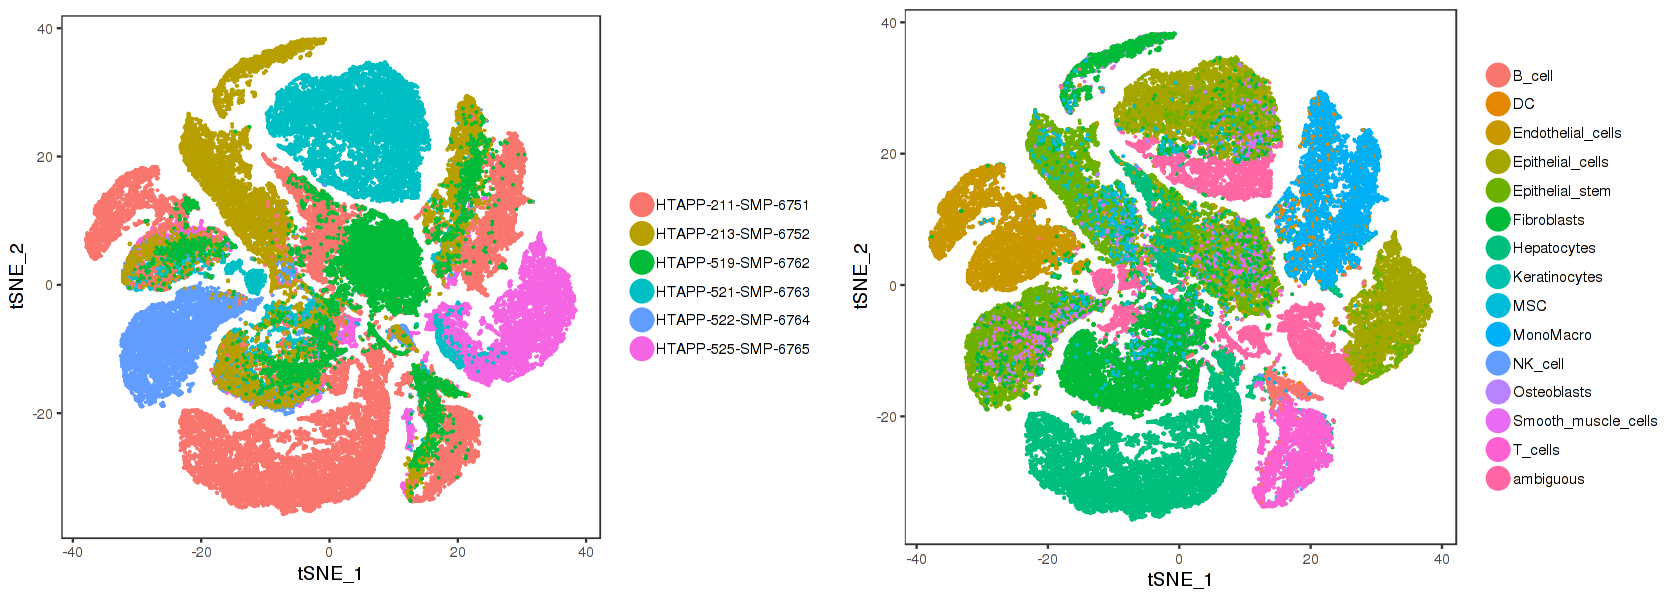

In [73]:
options(repr.plot.width = 14, repr.plot.height = 5)
p1=TSNEPlot(cs,do.label=FALSE,group.by="sampleID",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
p2=TSNEPlot(SubsetData(cs,subset.name = "N_labels",accept.low = 100),do.label=FALSE,group.by="labels_clean",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
plot_grid(p1,p2,rel_widths = c(1,1),ncol=2)

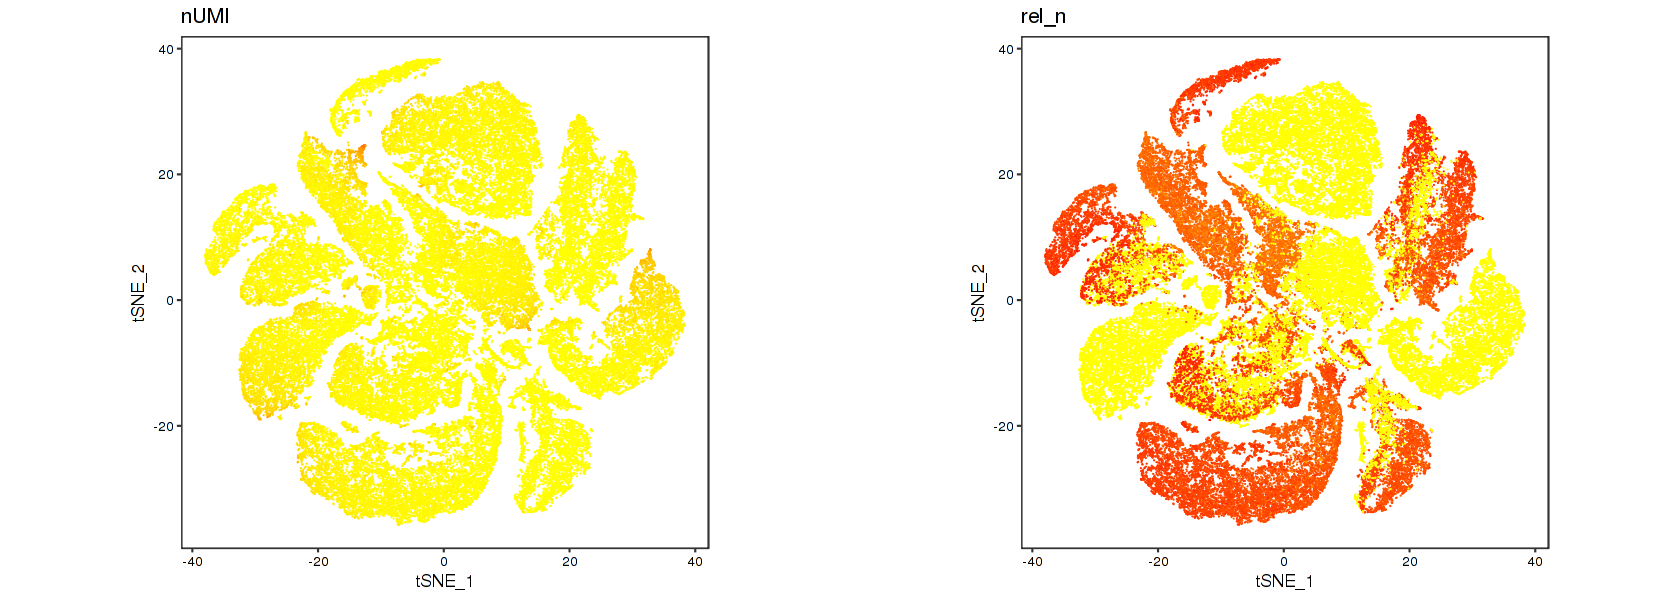

In [50]:
options(repr.plot.width = 14, repr.plot.height = 5)
p2=FeaturePlot(cs,features.plot = c("nUMI","rel_n"),coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)

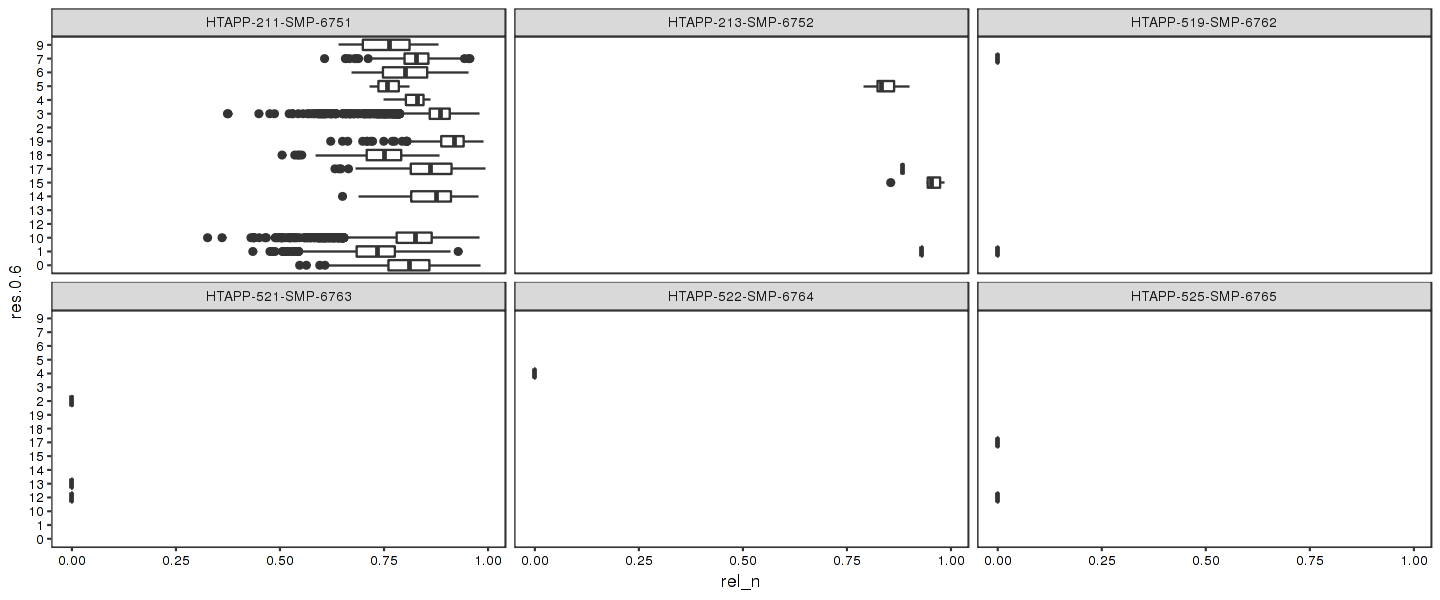

In [47]:
options(repr.plot.width = 12, repr.plot.height = 5)
ggplot(md[labels%in%c("Hepatocytes")],aes(x=res.0.6,y=rel_n,group=res.0.6))+geom_boxplot()+facet_wrap(~sampleID,ncol=3)+coord_flip()

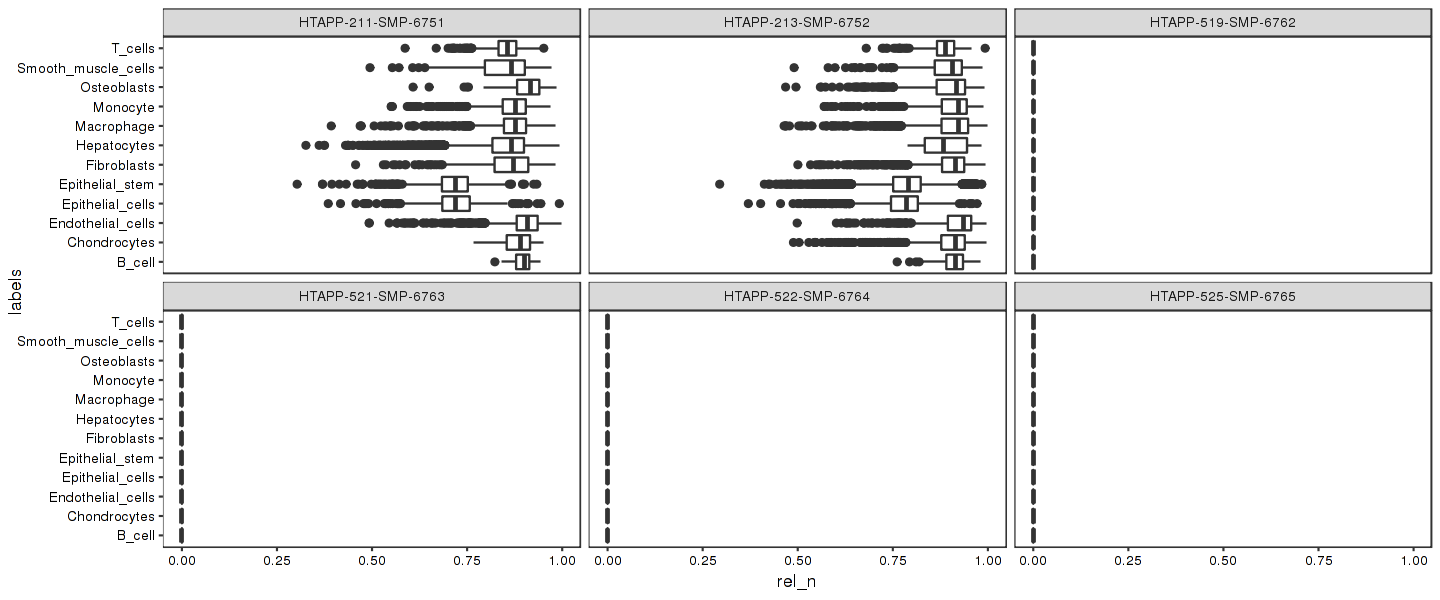

In [43]:
options(repr.plot.width = 12, repr.plot.height = 5)
ggplot(md[labels%in%c(cell_types,"Smooth_muscle_cells","Osteoblasts","Chondrocytes","Hepatocytes")],aes(x=labels,y=rel_n,group=labels))+geom_boxplot()+facet_wrap(~sampleID,ncol=3)+coord_flip()

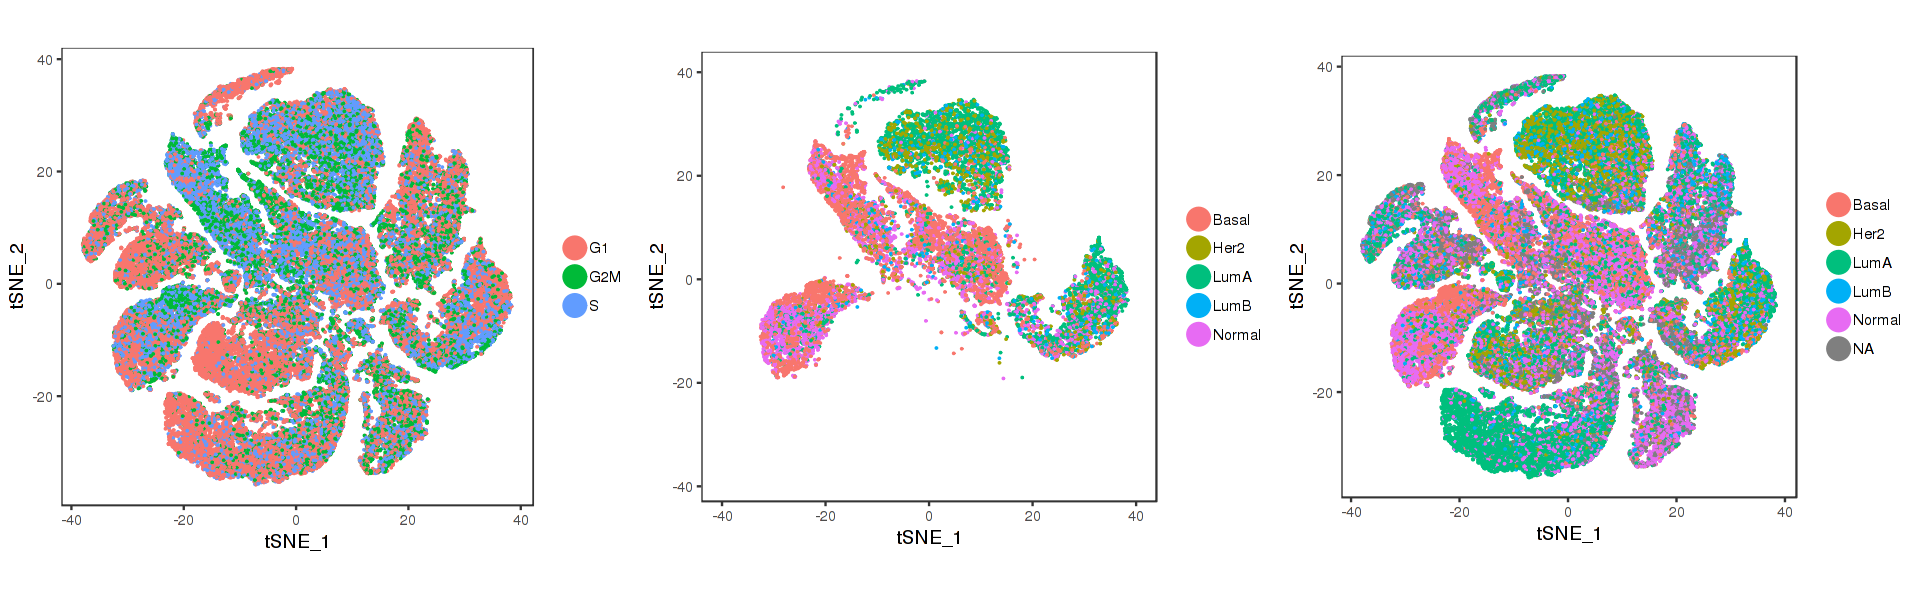

In [113]:
options(repr.plot.width = 16, repr.plot.height = 5)
p1=TSNEPlot(cs,do.label=FALSE,group.by="Phase",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
p2=TSNEPlot(SubsetData(SubsetData(cs,subset.name = "labels",accept.value = c("Epithelial_cells","Epithelial_stem")),subset.name = "subtype_filt",accept.value = c("Basal","Her2","LumA","LumB","Normal")),do.label=FALSE,group.by="subtype_filt",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
p3=TSNEPlot(cs,do.label=FALSE,group.by="subtype",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
plot_grid(p1,p2+ylim(c(-39,40))+xlim(c(-40,40)),p3,ncol=3)

### Use machine leaning to find genes that discriminate groups

In [104]:
find_cla=function(obj,ident,ident_types=NULL,s_name, s_types,var_genes=NULL,n=200,wp=0.04,wc=NULL,seed = 1234,RF=FALSE,ng=NULL){
    obj=SetIdent(obj,ident.use = obj@meta.data[,ident])
    cells=WhichCells(obj,subset.name = s_name,accept.value = s_types)
    if (!is.null(ident_types)){
        cells_ident=WhichCells(obj,subset.name = ident,accept.value = ident_types)
        cells=cells[cells%in%cells_ident]
    }
    sub=SubsetData(obj,cells.use = cells,max.cells.per.ident = n,random.seed = seed,do.center = TRUE,do.scale = TRUE)
    p1=TSNEPlot(sub,coord.fixed=TRUE,do.label=FALSE,group.by=ident,pt.size = 0.01,do.return=TRUE)
            
    if (is.null(var_genes)){
        sub=FindVariableGenes(sub,do.plot = FALSE,y.cutoff = 0.5,x.low.cutoff = 0.1) #prev 0.5
    }else{
        sub@var.genes=unique(var_genes[var_genes%in%rownames(sub@scale.data)])
    }
    nv=length(sub@var.genes)
    nc=ncol(sub@scale.data)
    print(paste0("N variable genes: ", nv))
    print(paste0("N cells: ", nc))
    
    dat=t(sub@scale.data[sub@var.genes,])
    lab=sub@meta.data[,ident]
    
    if (RF==TRUE){
        rf=randomForest(dat,as.factor(lab))
        print(paste0("rf mean error rate = ",signif(mean(rf$err.rate),3)))
    }
    c=heuristicC(dat)
    set.seed(1234)
    ac=LiblineaR(dat,lab,cost = c,type = 5,cross=5)
    print(paste0("accuracy before filtering = ",signif(ac,3)))
    l=LiblineaR(dat,lab,cost = c,type = 5) 
    
    w_dt=melt(as.data.table(t(l$W),keep.rownames = "gene"),id.vars = "gene")
    w_dt=w_dt[gene!="Bias"]
    w_dt[,value_norm:=abs(value)/sum(abs(value)),by=variable]
    w_dt[,rank:=rank(-abs(value),ties.method = "random"),by=variable]
    w_dt=w_dt[order(-abs(value))]
    w_dt[,value_norm_cs:=cumsum(value_norm),by=variable]
    w_dt[,direction:=ifelse(value>0,"+","-"),]
    w_dt[,tot_weight:=sum(abs(value)),by="gene"]

   
    if (!is.null(ng)){
        #maximum weight selection
        w_dt_red=w_dt[,.SD[which.max(abs(value))],by=gene]
        w_dt_filt=w_dt_red[order(tot_weight,decreasing=TRUE)][1:ng]
    }else if (!is.null(wc)){
        #filter by max cum weight
        w_dt_filt=w_dt[value_norm_cs<wc]}else{
        #filter by min weight
        w_dt_filt=w_dt[abs(value_norm)>wp|rank<=5]    
    }

    w_dt_filt=w_dt_filt[,.SD[order(direction,-value_norm)][1],by="gene"]
    w_dt_filt=w_dt_filt[order(as.character(variable),value_norm)]
    
    
    n_genes=w_dt_filt[direction=="-"]$gene
    p_genes=w_dt_filt[direction=="+"]$gene
    
    sel_genes=c(p_genes,n_genes)
    
    dat_filt=dat[,colnames(dat)%in%sel_genes]
    c=heuristicC(dat_filt)
    set.seed(1234)
    ac_filt=LiblineaR(dat_filt,lab,cost = c,type = 5,cross=5)
    print(paste0("accuracy after filtering = ",signif(ac_filt,3)))

    
    sub2=SubsetData(obj,cells.use = cells,max.cells.per.ident = n,random.seed = 2345,do.center = TRUE,do.scale = TRUE)
    dat2=t(sub2@scale.data)
    dat2=dat2[,colnames(dat2)%in%sel_genes]
    lab2=sub2@meta.data[,ident]
    c=heuristicC(dat2)
    ac2=LiblineaR(dat2,lab2,cost = c,type = 5,cross=5)
    print(paste0("accuracy after filtering and different data = ",signif(ac2,3)))
    same_cells=sum(rownames(dat2)%in%rownames(dat_filt))/nrow(dat2)
    print(paste0("% same cells = ",signif(same_cells,3)))
    
    p2=DoHeatmap(sub,group.cex = 6 ,slim.col.label = TRUE,group.label.rot = FALSE,do.plot = FALSE,
          draw.line = TRUE,genes.use = sel_genes,group.by = ident,cex.row = 5.5,cex.col = 0)

    cat(c("Neg. weight genes:",n_genes[!n_genes%in%p_genes]),sep = " ")
    cat(c("\nNumber of genes:",length(unique(w_dt_filt$gene))))
return=list(w=w_dt,w_filt=w_dt_filt,tsne=p1,hm=p2,p_genes=p_genes,n_genes=n_genes,wp=wp)
}

#### Cell type predictive genes

Scaling data matrix


[1] "N variable genes: 6089"
[1] "N cells: 1400"
[1] "rf mean error rate = 0.115"
[1] "accuracy before filtering = 0.891"
[1] "accuracy after filtering = 0.905"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.865"
[1] "% same cells = 0.075"
Neg. weight genes: XRCC3 ARHGAP15 TCF4
Number of genes: 66

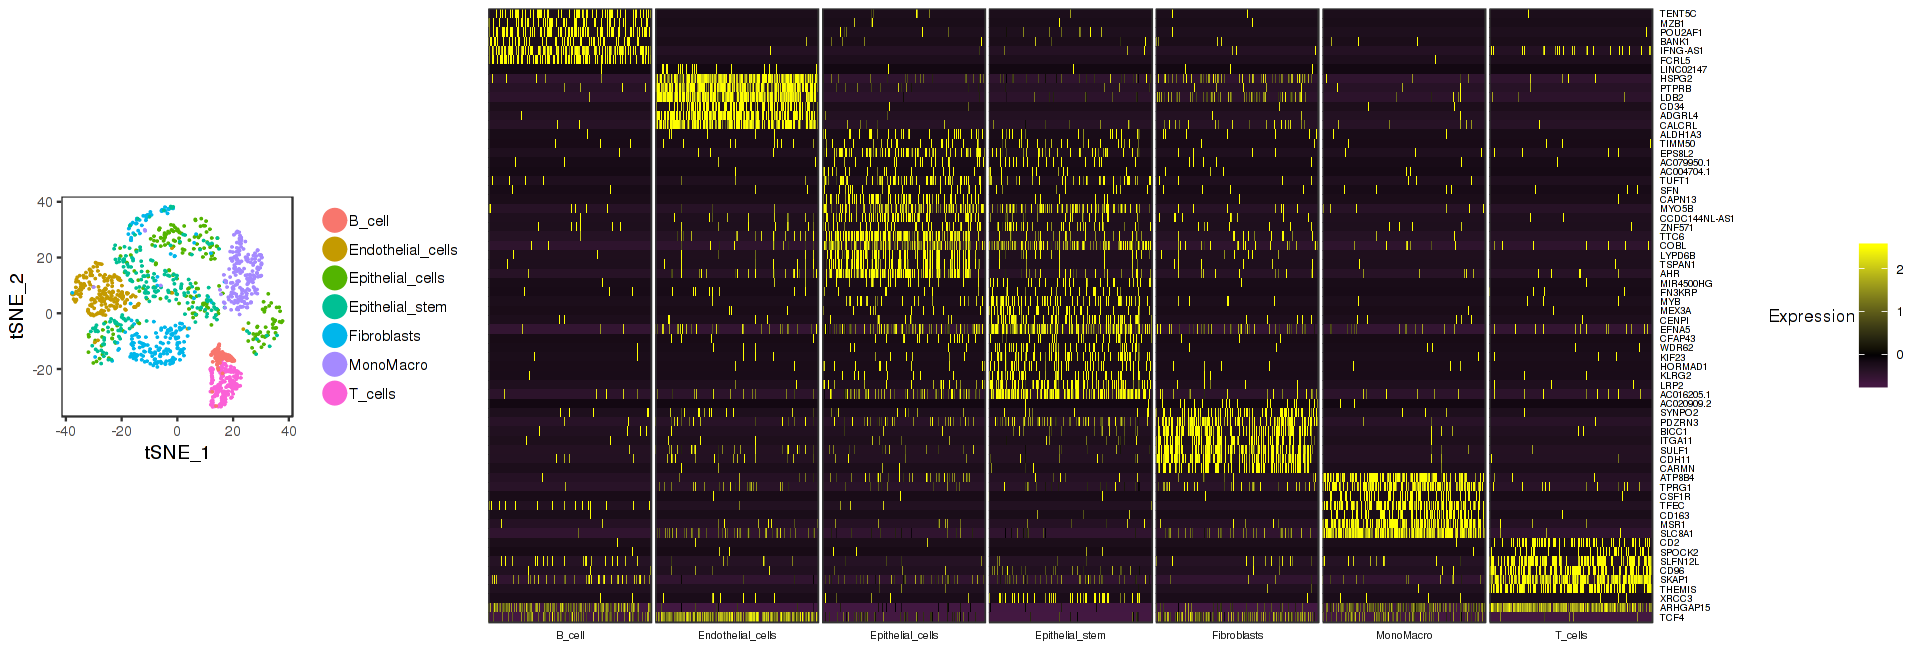

In [112]:
options(repr.plot.width = 16, repr.plot.height = 5.5)
cla_lab=find_cla(cs,ident = "labels_clean",s_name = "labels_clean",s_types = cell_types,wc=0.4,RF=T)
plot_grid(cla_lab$tsne,cla_lab$hm,rel_widths = c(1,3),ncol=2)

Scaling data matrix


[1] "N variable genes: 5958"
[1] "N cells: 1800"
[1] "accuracy before filtering = 0.813"
[1] "accuracy after filtering = 0.823"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.777"
[1] "% same cells = 0.0911"
Neg. weight genes: NAV3 POSTN TCF4 CEACAM6 NRP1 EPS8L2 HDAC9 AC044781.1 PPARG CCL4
Number of genes: 83

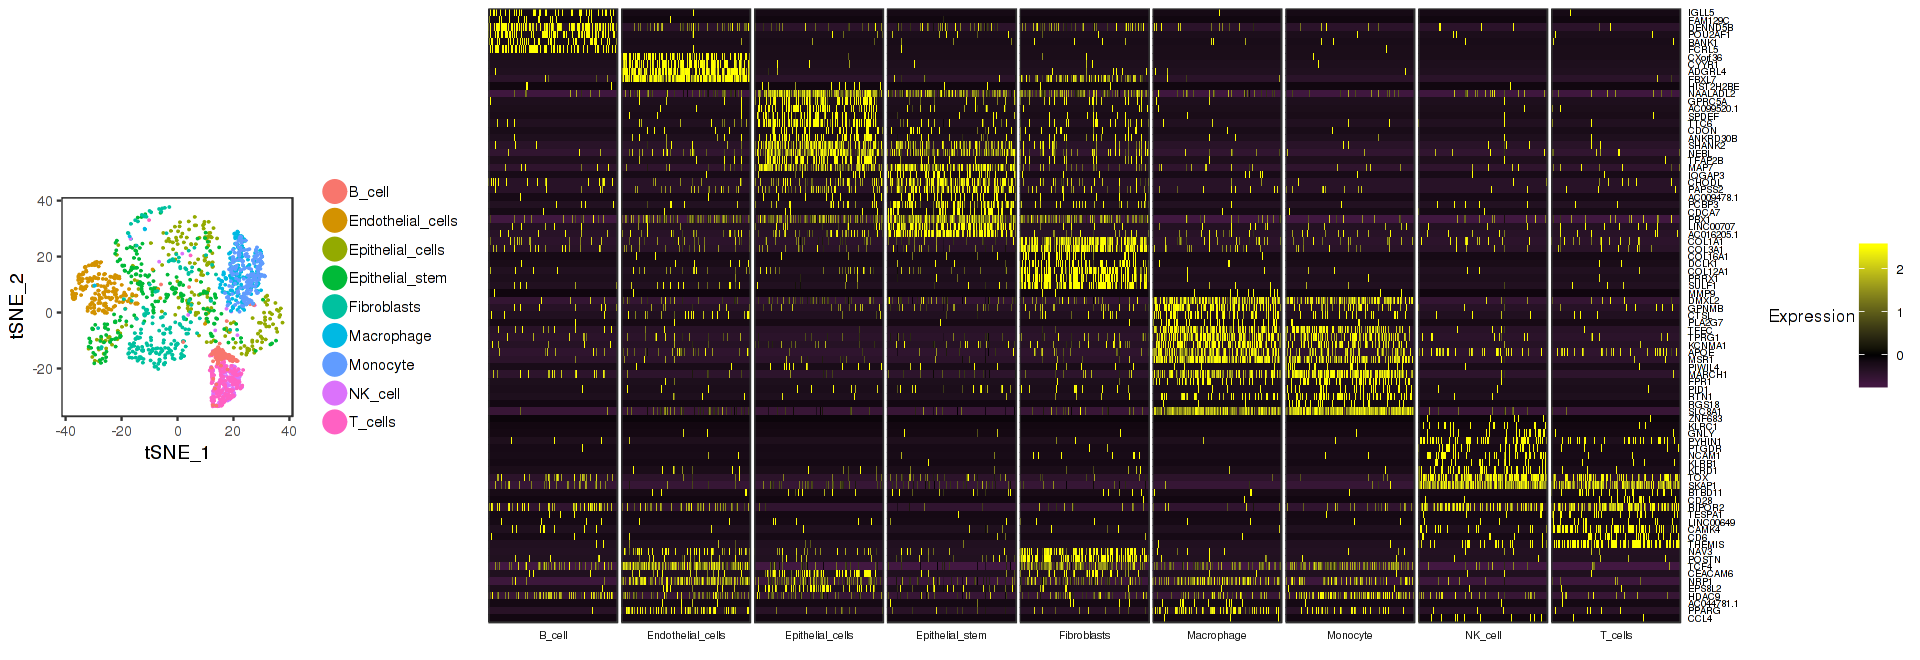

In [80]:
options(repr.plot.width = 16, repr.plot.height = 5.5)
cla_lab_raw=find_cla(cs,ident = "labels",s_name = "labels",s_types = c(cell_types[cell_types!="MonoMacro"],"NK_cell","Monocyte","Macrophage"),wc=0.35,RF=F)
plot_grid(cla_lab_raw$tsne,cla_lab_raw$hm,rel_widths = c(1,3),ncol=2)

In [89]:
ct_weighted_genes=cla_lab$w_filt
ct_weighted_genes[value_norm_cs<=0.3,priority:=1]
ct_weighted_genes[value_norm_cs>0.3,priority:=tot_weight/max(tot_weight)*0.9,]
ct_weighted_genes[,type:=paste0(variable,direction),]
ct_weighted_genes[,assay:="data_ct_frozen",]
head(ct_weighted_genes)
table(duplicated(ct_weighted_genes$gene))

gene,variable,value,value_norm,rank,value_norm_cs,direction,tot_weight,priority,type,assay
TENT5C,B_cell,0.06074110,0.04034139,6,0.38077357,+,0.06074110,0.641614,B_cell+,data_ct_frozen
MZB1,B_cell,0.08520231,0.05658738,5,0.34043218,+,0.08520231,0.900000,B_cell+,data_ct_frozen
POU2AF1,B_cell,0.09072883,0.06025784,4,0.28384479,+,0.09072883,1.000000,B_cell+,data_ct_frozen
BANK1,B_cell,0.10453267,0.06942570,3,0.22358696,+,0.10453267,1.000000,B_cell+,data_ct_frozen
IFNG-AS1,B_cell,0.10575282,0.07023607,2,0.15416125,+,0.10575282,1.000000,B_cell+,data_ct_frozen
FCRL5,B_cell,0.12636421,0.08392519,1,0.08392519,+,0.12636421,1.000000,B_cell+,data_ct_frozen



FALSE 
   66 

In [91]:
write.table(ct_weighted_genes[,c("gene","type","priority","assay")],"data_frozen_V3_ct.tsv",sep="\t",quote=FALSE,row.names=FALSE)

Scaling data matrix


[1] "N variable genes: 41"
[1] "N cells: 6632"
[1] "accuracy before filtering = 0.851"
[1] "accuracy after filtering = 0.851"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.856"
[1] "% same cells = 0.256"
Neg. weight genes:
Number of genes: 41

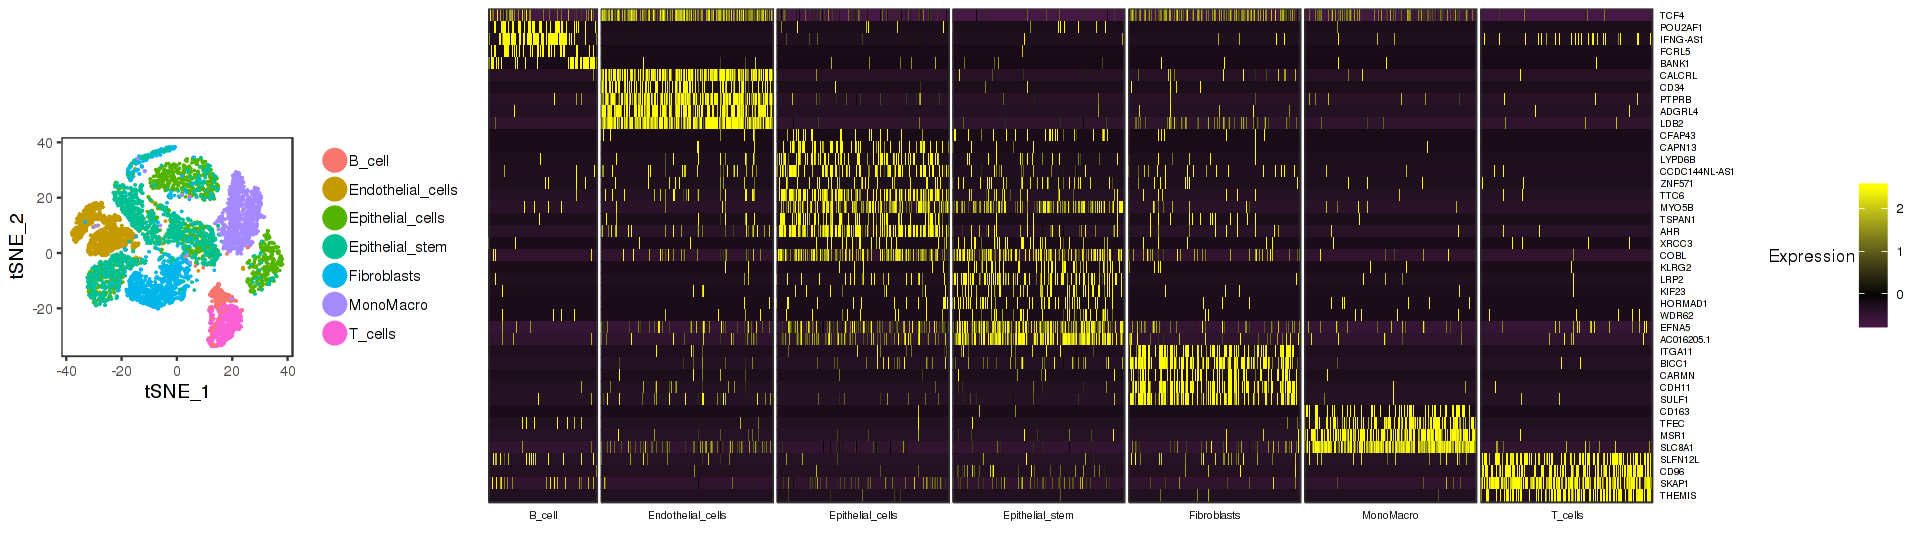

In [90]:
options(repr.plot.width = 16, repr.plot.height = 4.5)
cla_lab2=find_cla(cs,ident = "labels_clean",s_name = "labels_clean",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority==1]$gene)
plot_grid(cla_lab2$tsne,cla_lab2$hm,rel_widths = c(1,3),ncol=2)

In [92]:
cla_lab2=find_cla(cs,ident = "labels_clean",s_name = "labels_clean",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority>0.4]$gene)

Scaling data matrix


[1] "N variable genes: 56"
[1] "N cells: 6632"
[1] "accuracy before filtering = 0.875"
[1] "accuracy after filtering = 0.875"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.881"
[1] "% same cells = 0.256"
Neg. weight genes:
Number of genes: 56

In [102]:
cla_lab2=find_cla(cs,ident = "labels_clean",s_name = "labels_clean",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority>0.3]$gene)

Scaling data matrix


[1] "N variable genes: 61"
[1] "N cells: 6632"
[1] "accuracy before filtering = 0.878"
[1] "accuracy after filtering = 0.878"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.883"
[1] "% same cells = 0.256"
Neg. weight genes:
Number of genes: 61

In [94]:
cla_lab2=find_cla(cs,ident = "labels_clean",s_name = "labels_clean",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority>0]$gene)

Scaling data matrix


[1] "N variable genes: 66"
[1] "N cells: 6632"
[1] "accuracy before filtering = 0.879"
[1] "accuracy after filtering = 0.879"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.884"
[1] "% same cells = 0.256"
Neg. weight genes:
Number of genes: 66

#### Refinement of pam50 genes

Scaling data matrix


[1] "N variable genes: 49"
[1] "N cells: 1000"
[1] "rf mean error rate = 0.165"
[1] "accuracy before filtering = 0.937"
[1] "accuracy after filtering = 0.937"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.939"
[1] "% same cells = 0.126"
Neg. weight genes: PTTG1
Number of genes: 49

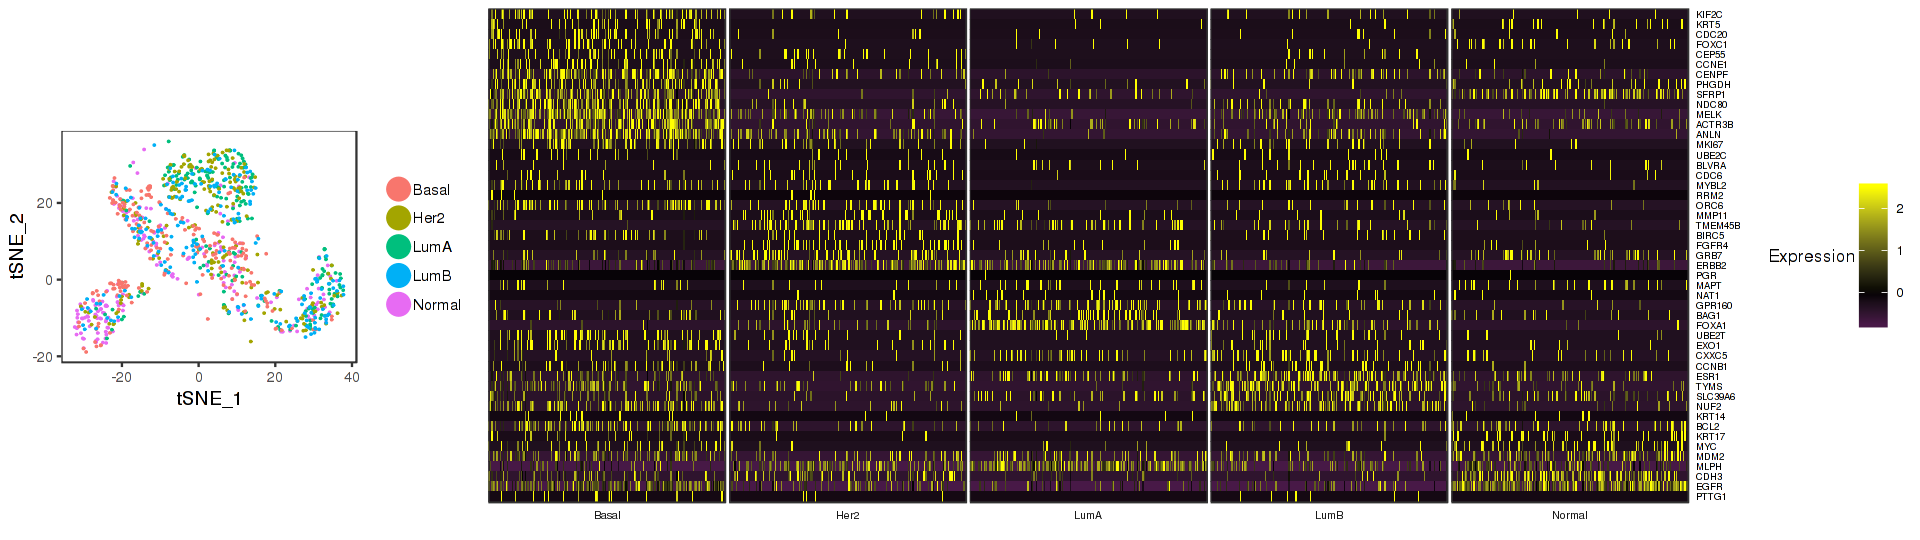

In [105]:
options(repr.plot.width = 16, repr.plot.height = 4.5)
cla_pam50=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),wc=1.1,RF=T,var_genes = pam50_gene)
plot_grid(cla_pam50$tsne,cla_pam50$hm,rel_widths = c(1,3),ncol=2)

In [106]:
pam50_weighted_genes=cla_pam50$w_filt
pam50_weighted_genes[value_norm_cs<=0.8,priority:=1]
pam50_weighted_genes[value_norm_cs>0.8,priority:=tot_weight/max(tot_weight)*0.9,]
pam50_weighted_genes[,type:=paste0(variable,direction),]
pam50_weighted_genes[,assay:="pam50_frozen",]
head(pam50_weighted_genes)
table(duplicated(pam50_weighted_genes$gene))

gene,variable,value,value_norm,rank,value_norm_cs,direction,tot_weight,priority,type,assay
KIF2C,Basal,0.06267501,0.009759363,32,0.9600002,+,0.1005348,0.1496610,Basal+,pam50_frozen
KRT5,Basal,0.09245573,0.014396631,24,0.8682313,+,0.6045752,0.9000000,Basal+,pam50_frozen
CDC20,Basal,0.12845858,0.020002772,21,0.8168399,+,0.3178284,0.4731347,Basal+,pam50_frozen
FOXC1,Basal,0.13192928,0.020543206,20,0.7968371,+,0.7631543,1.0000000,Basal+,pam50_frozen
CEP55,Basal,0.15993990,0.024904847,18,0.7523707,+,0.7930414,1.0000000,Basal+,pam50_frozen
CCNE1,Basal,0.15998952,0.024912573,17,0.7274658,+,0.5689049,1.0000000,Basal+,pam50_frozen



FALSE 
   49 

In [107]:
write.table(pam50_weighted_genes[,c("gene","type","priority","assay")],"data_frozen_V3_pam50.tsv",sep="\t",quote=FALSE,row.names=FALSE)

Scaling data matrix


[1] "N variable genes: 36"
[1] "N cells: 2500"
[1] "accuracy before filtering = 0.924"
[1] "accuracy after filtering = 0.924"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.917"
[1] "% same cells = 0.331"
Neg. weight genes:
Number of genes: 36

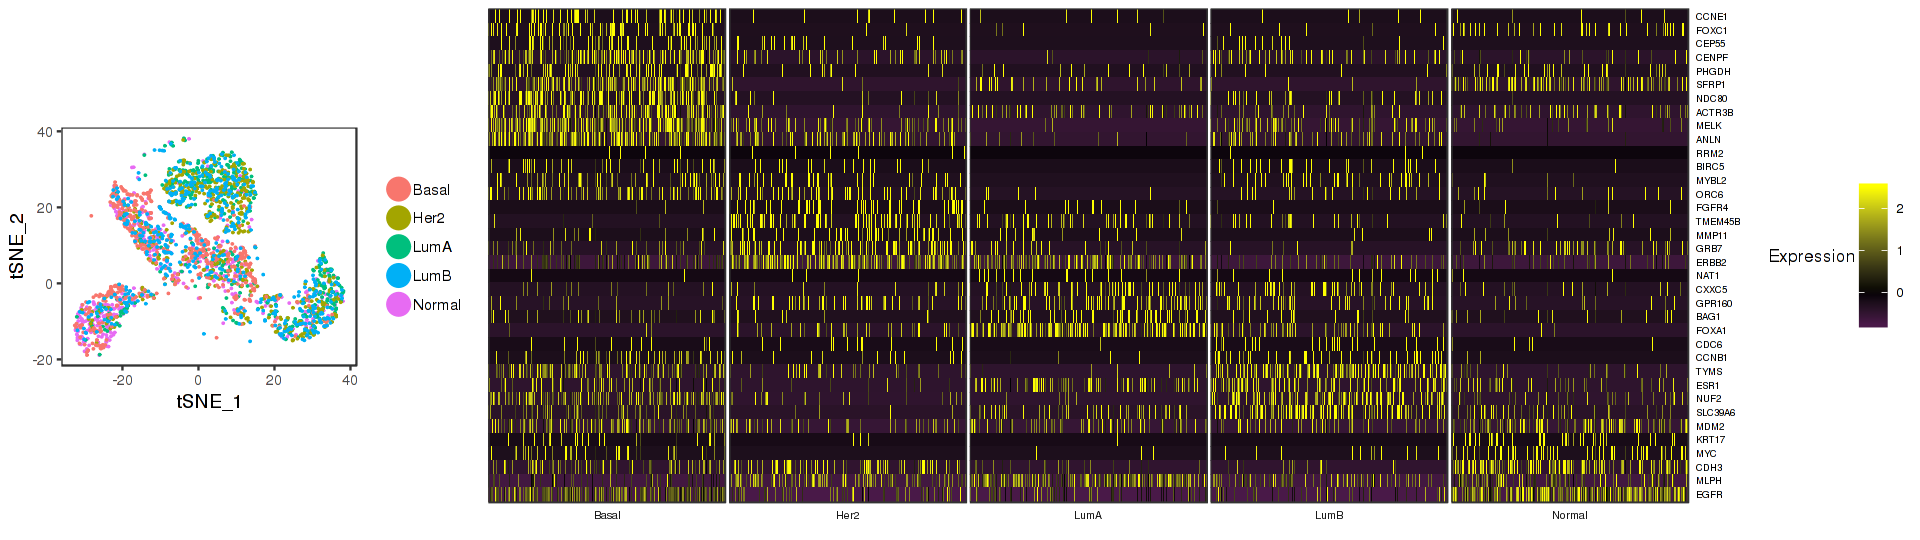

In [108]:
options(repr.plot.width = 16, repr.plot.height = 4.5)
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1.1,n=500,var_genes = pam50_weighted_genes[priority==1]$gene)
plot_grid(cla_pam50_2$tsne,cla_pam50_2$hm,rel_widths = c(1,3),ncol=2)

In [109]:
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1.1,n=500,var_genes = pam50_weighted_genes[priority>0.5]$gene)

Scaling data matrix


[1] "N variable genes: 43"
[1] "N cells: 2500"
[1] "accuracy before filtering = 0.956"
[1] "accuracy after filtering = 0.956"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.956"
[1] "% same cells = 0.331"
Neg. weight genes:
Number of genes: 43

In [110]:
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1.1,n=500,var_genes = pam50_weighted_genes[priority>0.3]$gene)

Scaling data matrix


[1] "N variable genes: 45"
[1] "N cells: 2500"
[1] "accuracy before filtering = 0.96"
[1] "accuracy after filtering = 0.96"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.96"
[1] "% same cells = 0.331"
Neg. weight genes:
Number of genes: 45

In [111]:
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1.1,n=500,var_genes = pam50_weighted_genes[priority>0]$gene)

Scaling data matrix


[1] "N variable genes: 49"
[1] "N cells: 2500"
[1] "accuracy before filtering = 0.963"
[1] "accuracy after filtering = 0.963"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.96"
[1] "% same cells = 0.331"
Neg. weight genes:
Number of genes: 49